In [1]:
include("../src/vafdyn.jl")
using .VAFDyn

In [2]:
using Plots
gr()

Plots.GRBackend()

In [57]:
params = Dict(
    "ρ"=>2.,
    "μ"=>1.2,
    "ϕ"=>4.,
    "N"=>10000
)

Dict{String,Real} with 4 entries:
  "μ" => 1.2
  "ϕ" => 4.0
  "ρ" => 2.0
  "N" => 10000

In [58]:
evolveTime = 59

# discrete evolve
dfs = VAFDyn.DFreqspace(params["N"])
VAFDyn.evolveVAF(dfs, params, evolveTime, 0.0001)

sampledfs, sampledMuts = VAFDyn.sampler(dfs, 80);

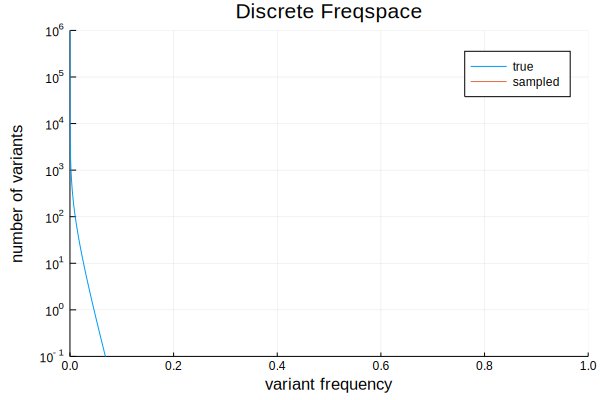

In [59]:
# plotting
h = plot(dfs.freqs_f[1:end], dfs.n_f[1:end], label="true", yaxis=:log10)
# plot!(cfs.freqs_f[2:end-1], cfs.n_f[2:end-1]/params.N, linestyle=:dash, label="PDE")
# plot!(cfs.freqs_f[2:end-1], map(x -> params.μ/x, cfs.freqs_f[2:end-1]), linestyle=:dot, label="μ/f")
xlims!((0, 1))
ylims!((10^-1, 10^6))
xlabel!("variant frequency")
ylabel!("number of variants")
title!("Discrete Freqspace")

plot!(h, sampledfs.freqs_f[2:end], sampledfs.n_f[2:end], label="sampled", yaxis=:log10)
display(h)